---
layout: default
title: "Deep Learning - RNN architectures"
categories: deeplearning
permalink: /ML44/
order: 44
comments: true
---

In [1]:
%pylab --no-import-all inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
plt.rcParams["mathtext.fontset"] = "cm"
from matplotlib.patches import Rectangle, Circle
from mpl_flow import Flow

Populating the interactive namespace from numpy and matplotlib


In [2]:
def many_to_one(ax):
#     ax.set_title('Many to One', fontsize=11)
    f = Flow(bbox=dict(boxstyle='square'), figsize=(4,4), ax=ax)
    for i in range(1, 6):
        lbl = i if i < 5 else 'T_x'

        if i != 4:
            f.node(f'a{i}', label='\n'*5+' '*3, fontsize=13, startpoint=f'a{i-1}')
        else:
            f.node(f'a{i}', label='$\\cdots$', startpoint=f'a{i-1}', fontsize=13, bbox=dict(ec='none'))

        if i >0 and i != 4:
            f.node(f'x{i}', label=f'$x^{{\\langle {lbl} \\rangle}}$', startpoint=f'a{i}', travel='s', fontsize=13, 
                   edge_kwargs=dict(arrowprops=dict(arrowstyle='->')), bbox=dict(ec='none'))

    f.node(f'y{i}', label=f'$\\hat{{y}}$', startpoint=f'a{i}', travel='n', fontsize=13,
           bbox=dict(ec='none'))

def many_to_many(ax, steps):
#     howmuch = 'Many' if steps > 1 else 'One'
#     ax.set_title(f'{howmuch} to {howmuch}', fontsize=11)
    f = Flow(bbox=dict(boxstyle='square'), figsize=(4,4), ax=ax)
    for i in range(1, steps+1):
        lbl = i if i < 5 else 'T_x'

        if i != 4:
            f.node(f'a{i}', label='\n'*5+' '*3, fontsize=13, startpoint=f'a{i-1}')
        else:
            f.node(f'a{i}', label='$\\cdots$', startpoint=f'a{i-1}', fontsize=13, bbox=dict(ec='none'))

        if i >0 and i != 4:
            supscript = f'^{{\\langle {lbl} \\rangle}}' if steps > 1 else ''
            f.node(f'x{i}', label=f'$x{supscript}$', startpoint=f'a{i}', travel='s', fontsize=13, 
                   edge_kwargs=dict(arrowprops=dict(arrowstyle='->')), bbox=dict(ec='none')) 
            if i == 5:
                lbl = 'T_y'
                supscript = f'^{{\\langle {lbl} \\rangle}}' if steps > 1 else ''
            f.node(f'y{i}', label=f'$\\hat{{y}}{supscript}$', startpoint=f'a{i}', travel='n', fontsize=13,
                   bbox=dict(ec='none'))

def one_to_many(ax):
#     ax.set_title('One to Many', fontsize=11)
    f = Flow(bbox=dict(boxstyle='square'), figsize=(4,4), ax=ax)
    for i in range(1, 6):
        lbl = i if i < 5 else 'T_x'

        if i != 4:
            f.node(f'a{i}', label='\n'*5+' '*3, fontsize=13, startpoint=f'a{i-1}')
        else:
            f.node(f'a{i}', label='$\\cdots$', startpoint=f'a{i-1}', fontsize=13, bbox=dict(ec='none'))

        if i == 1:
            f.node(f'x{i}', label=f'$x$', startpoint=f'a{i}', travel='s', fontsize=13, 
                   edge_kwargs=dict(arrowprops=dict(arrowstyle='->')), bbox=dict(ec='none')) 
        if i > 0 and i != 4:
            lbl = lbl if i != 5 else 'T_y'
            f.node(f'y{i}', label=f'$\\hat{{y}}^{{\\langle {lbl} \\rangle}}$', startpoint=f'a{i}', travel='n', fontsize=13,
                   bbox=dict(ec='none'))
            

        if i > 1 and i < 4:
            f.edge(f'y{i-1}', f'a{i}', headport='s', tailport='s', 
                   arrowprops=dict(connectionstyle='arc,angleA=-110,angleB=-10,armA=30,armB=10,rad=10', shrinkA=10, shrinkB=10, ec='r'))

# RNN architectures
In <a href="page:ML43">ML-43</a> we have seen an RNN architecture where $T_x = T_y$. For most applications, this is not the case and the basic RNN architecture that we have seen in <a href="page:ML43">ML-43</a> can be modified to map sequence-related $x$ and $y$ with different shapes.

## IO relationship
The basic RNN architecture that we have seen in <a href="page:ML43">ML-43</a> maps many input to as many outputs and it is therefore called a Many-to-Many architecture. Furthermore, in that architecture $T_x = T_y$. This condition is not always the case and other relationship balances exist: additionally to the many-to-may we have one-to-one, one-to-many and many-to-one.

### One-to-One
A one-to-one architecture maps an input $x$ to an output $y$ in a single time-step and it is a limit case, which is identical to a classical (non-recurrent) neural network <a href="#fig:oto">figure below</a>)

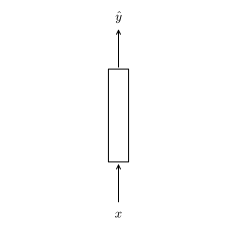

In [3]:
fig, ax = plt.subplots(figsize=(4,4))
many_to_many(ax, 1)

<i id="fig:oto">One to One RNN: an RNN with a single time step where the input $x$ passes through the network only once to produce $y$. This is equivalent to a classic (non-recursive) neural network</i>

### Many-to-One
Suppose we want to train an RNN for a sentiment classification task where, given an sentence $x$, the task is to produce a number $y$ indicating how good is the sentiment that the sentence expresses. For example, we could have movie reviews as input and the task is to tell if the review is good or bad. The words of the input review are parsed in subsequent time-steps, but only one output is produced at the end of the process (<a href="#fig:mto">figure below</a>)  This is a Many-to-One architecture where we want to map mulitple inputs (multiple words in a sentence) to a single output (the review mark).

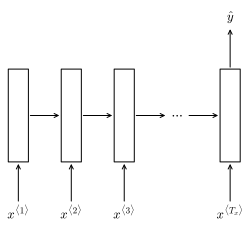

In [4]:
fig, ax = plt.subplots(figsize=(4, 4))
many_to_one(ax)

<i id="fig:mto">Many to One RNN: inputs fed through each time-step $x^{\langle t \rangle}$ concur to produce a single output $\hat{y}$</i>

### One-to-Many
Suppose we want to create a music generation algorithm, where the goal is for the RNN to output a set of notes from a single number input, representing for example the music genre. One-to-many RNN, also called **sequence generation** algorithms, usually feed the output of a time-step $\hat{y}^{\langle t \rangle}$ to the next time-step (<a href="#fig:otm">figure below</a>). Sequence generative models have some more subtlety to them that are better explained in a dedicated section.

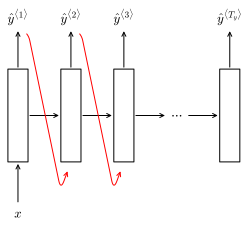

In [5]:
fig, ax =plt.subplots(figsize=(4,4))
one_to_many(ax)

<i id="fig:otm">One to Many RNN: a single (or even no) input elicit the production of a series of outputs</i>

### Many-to-Many
We have already seen a Many-to-Many RNN in <a href="page:ML43">ML-43</a>, which we used as a basic example of RNN architecture (<a href="fig:mtm">figure below</a>, panel A). Another case exists of many to many architecture, where $T_x \neq T_y$ (<a href="fig:mtm">figure below</a>, panel B). In this architecture input and output are temporally separated: a series of time-steps $[1, T_x]$ only take inputs and another series of time-steps $[1, T_y]$ only produce outputs. Since there is this clear distinction from input and output time-steps they are also referred to as the **encoder** and **decoder**, respectively: the encoder encodes the input and decoder maps the encoded input to the output.

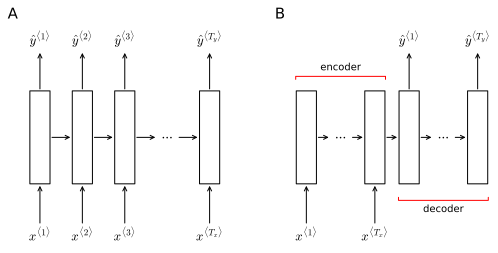

In [6]:
def encoder_decoder(ax, steps=7):
    f = Flow(bbox=dict(boxstyle='square'), figsize=(4,4), ax=ax)
    for i in range(1, steps):
        lbl = i if i < 5 else 'T_x'

        if i not in [2,5]:
            f.node(f'a{i}', label='\n'*5+' '*3, fontsize=13, startpoint=f'a{i-1}')
        else:
            f.node(f'a{i}', label='$\\cdots$', startpoint=f'a{i-1}', fontsize=13, bbox=dict(ec='none'))

        if i < 4 and i != 2:
            if i == 3:
                lbl = 'T_x'
            f.node(f'x{i}', label=f'$x^{{\\langle {lbl} \\rangle}}$', startpoint=f'a{i}', travel='s', fontsize=13, 
                   edge_kwargs=dict(arrowprops=dict(arrowstyle='->')), bbox=dict(ec='none')) 
            
        if i >= 4 and i != 5:
            if i == 6:
                lbl = 'T_y'
            else:
                lbl = i - 3
            f.node(f'y{i}', label=f'$\\hat{{y}}^{{\\langle {lbl} \\rangle}}$', startpoint=f'a{i}', travel='n', fontsize=13,
                   bbox=dict(ec='none'))
    encoder_bbox = f.nodes['a2'].annotation.get_bbox_patch()
    decoder_bbox = f.nodes['a5'].annotation.get_bbox_patch()
    plt.annotate('encoder', (0.5, 3.5), (0.5, 3.8) , xycoords=encoder_bbox, textcoords=encoder_bbox, ha='center', 
                 arrowprops=dict(arrowstyle='-[,widthB=4.5,lengthB=0.3,angleB=0', ec='r'))
    plt.annotate('decoder', (0.5, -2.5), (0.5, -2.8) , xycoords=decoder_bbox, textcoords=decoder_bbox, ha='center', va='top',
                 arrowprops=dict(arrowstyle='-[,widthB=4.5,lengthB=0.3,angleB=0', ec='r'))


fig = plt.figure(figsize(8, 4))
gs = fig.add_gridspec(1,2, wspace=0.5)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
many_to_many(ax1, 5)
ax1.text(-.1, 1.1, 'A', transform=ax1.transAxes, va='top', ha='right', fontsize=15)
encoder_decoder(ax2)
ax2.text(-.1, 1.1, 'B', transform=ax2.transAxes, va='top', ha='right', fontsize=15);

<i id="fig:mtm">Mnay-to-Many RNN architectures. A many to many architecture can map an equal number of input and output (A) or input and output of different sizes (B)</i>

## Language models
Language models are one of the most fundamental tasks in natural language processing (NLP) and one where RNNs excel. A language model encode the context of a word in a sentence. Suppose we have a speech-recognition algorithm listening to either one of these two sentences:

```
The apple and pair salad
The apple and pear salad
```

`Pair` and `Pear` are pronounced almost the same but one is much more likely than the other. We can easily understand which one because we consider the context of this word in the sentence. A good speech-recognition algorithm will also be able to discriminate which one is more likely thanks to a **language model**.

A language model outputs the probability of a particular sentence to belong to a language and in doing that, it is a fundamental component of both speech recognition and machine translation algorithms. So for example we would have

$$
\begin{split}
& P(\small{\text{The apple and pair salad}}) = 10 ^{-13} \\
& P(\small{\text{The apple and pear salad}}) = 10^{-10}
\end{split}
$$

In general we would say that a language model outputs the probability $P$ of a sentence, where the sentence is a particular sequence of words $y^{\langle t \rangle}$ (in language models inputs are usually represented with $y$ rather than with the traditional $x$):

$$
P \left(y^{\langle 1 \rangle}, y^{\langle 2 \rangle}, \dots y^{\langle T_y \rangle} \right)
$$


### RNN for language modeling
To build a language model it is necessary a large corpus of text (in the target language) to use as a training set. The corpus is made of sentences as for example

```
Cats average 15 hours of sleep a day
```

Each sentence in the training set is tokenized in words. In tokenization each word is mapped to a vocabulary and represented by a vector $y^{\langle t \rangle}$, which encodes for the position of the token in the vocabulary. Words that are not in the vocabulary are assigned a special token $\langle \text{UNK} \rangle$, which is the vocabulary term for unknown words. Usually an additional token marking the end of a sentence $\langle \text{EOS} \rangle$ is used but is is not essential.

```
Cats average 15 hours of sleep a day <EOS>
```

Tokens are then fed to the RNN one step at a time: 

1. At step 1, the RNN is fed $a^{\langle 0 \rangle}$ and $x^{\langle 1 \rangle}$, which are usually both set to an arrays of zeros. in the first step the RNN is equivalent to a softmax classifier that outputs $y^{\langle 1 \rangle}=P(\text{Cats})$: the word `Cats` mapped in the vocabulary 
2. At step 2, the RNN is fed $y^{\langle 1 \rangle}$ and outputs $y^{\langle 1 \rangle} = P(\text{average} \mid \text{ Cats})$: the conditional probability of the word `average` given `Cats`
3. At step 3, the RNN is fed $y^{\langle 2 \rangle}$ and outputs $y^{\langle 1 \rangle} = P(15 \mid P(\text{average} \mid \text{ Cats}))$: the conditional probability of the word `15` given `Cats average`
4. ...

This process continues up to the EOS step, which computes the probability of ending the sentence given the sentence (<a href="#fig:langmod">figure below</a>). By feeding each step the distribution of preceding words this RNN learns to predict one word a time.

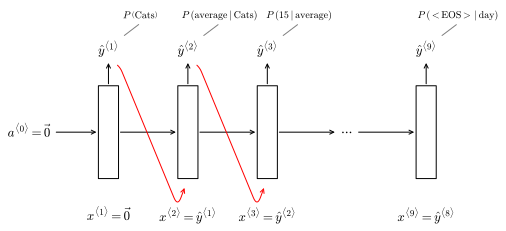

In [7]:
s = 'Cats average 15 hours of sleep a day <EOS>'.split()
f = Flow(bbox=dict(boxstyle='square'), figsize=(8,4))
for i in range(0, 10):
    if i not in [5, 6, 7, 8]:
        if i == 0:
            f.node(f'a{i}', label=f'$a^{{\\langle 0 \\rangle}} = \\vec{0}$', fontsize=13, startpoint=f'a{i-1}', bbox=dict(ec='none', fc='none'))
        elif i != 4:
            f.node(f'a{i}', label='\n'*5+' '*3, fontsize=13, startpoint=f'a{i-1}')
        else:
            f.node(f'a{i}', label='$\\cdots$', startpoint=f'a{i-1}', fontsize=13, bbox=dict(ec='none'))

        if i >0 and i != 4:
            equivalent = '\\vec{0}' if i == 1 else f'\\hat{{y}}^{{\\langle {i-1} \\rangle}}'
            f.node(f'y{i}', label=f'$\\hat{{y}}^{{\\langle {i} \\rangle}}$', startpoint=f'a{i}', travel='n', fontsize=13,
                   bbox=dict(ec='none'))
            f.node(f'x{i}', label=f'$x^{{\\langle {i} \\rangle}}={equivalent}$', startpoint=f'a{i}', travel='s', fontsize=13, connect=False,
                   edge_kwargs=dict(arrowprops=dict(arrowstyle='->')), bbox=dict(ec='none'))
            given = f'\\mid \\mathrm{{{s[i-2]}}}' if i > 1 else ''
            f.node(f'p{i}', label=f'$P \; \\left(\\mathrm{{{s[i-1]}}}{given} \\right)$', startpoint=f'y{i}', travel='ne',
                   distance=0.4, bbox=dict(ec='none', fc='none'), edge_kwargs=dict(headport='s', arrowprops=dict(arrowstyle='-', ec='gray')), fontsize=10)
        
        if i > 1 and i < 4:
            f.edge(f'y{i-1}', f'a{i}', headport='s', tailport='s', 
                   arrowprops=dict(connectionstyle='arc,angleA=-110,angleB=-10,armA=30,armB=10,rad=10', shrinkA=10, shrinkB=10, ec='r'))

<i id="fig:langmod">Processing of one training example from a corpus of sentence during training of a language modelling RNN</i>

To train this RNN the loss ($\mathcal{L}$) and cost ($J$) functions are defined as:

$$\begin{split}
&\mathcal{L}\left(\hat{y}^{\langle t \rangle}, y^{\langle t \rangle} \right ) = - \sum_i y_i^{\langle t \rangle} \log \hat{y}_i^{\langle t \rangle} \\
&J=\sum_t \mathcal{L}^{\langle t \rangle} \left(\hat{y}^{\langle t \rangle}, y^{\langle t \rangle}\right )
\end{split}
$$

### Sampling novel sequences
Once a sequence model is trained you can get a sense of what it has learned by letting it **sample novel sequences**. Let's see this applied to out language model.

A sequence model models the chance of any particular sequence of elements as $P \left(y^{\langle 1 \rangle}, \dots, y^{\langle T_x \rangle} \right)$. This distribution can be sampled to generate novel sequences. The sampling of novel sequences follow the same identical process shown in <a href="#fig:langmod">the figure above</a>, but in sequence sampling each output $\hat{y}^{\langle t \rangle}$ is randomly sampled from the trained probability distribution of the elements in the training set. 

1. The first sample $\hat{y}^{\langle 1 \rangle}$ is a random sampling of $P \left(y^{\langle 1 \rangle}, \dots, y^{\langle T_x \rangle} \right)$
2. The second sample $\hat{y}^{\langle 2 \rangle}$  is a random sampling from $P \left(?\mid \hat{y}^{\langle 1 \rangle} \right)$
3. ...

The sequence sampling can stop when a EOS is sampled or at a specific number of sampled tokens.

This sequence sample model example is built on a word-level language model but these principle applies to other applications of sequence generative models. For example, we could also build a character-level sampling model (based on a language model trained at character-level) which would sample from a distribution of probability of occurrence of characters instead of words. Such a model would have the advantage of not having to deal with unknown words, but on the other hand it would not be able to capture the relationship between distant ends of a sentence as well as a word-level language model. These distant relationships, or **long-term dependencies**, which tend to be very important in natural language (as well as in many other sequence models), while being better captured by a word-level model, still pose a problem for the simple RNN architecture that we have seen so far.

## Long-term dependencies
Long-term dependencies tend to be very important in many sequence models: consider the following long sentences:

> The **hero**, who can barely stand after  the ravenous attack of an uncanny foe, **has** an idea

> The **heroes**, who can barely stand after the ravenous attack of an uncanny foe, **have** an idea

The word `hero` and the word `has` are at opposing ends of the sentence but they need to be in accordance. And this is just one example of language having very long-term dependencies were an early word affects what needs to come much later in a sentence. The basic RNN architecture that we have seen so far however, is not very good at capturing long-term dependencies due to **vanishing gradients**.

### Vanishing gradients with RNNs
One of the problems of the basic RNN architecture is that it runs into the problem of vanishing gradients which we have seen, together with exploding gradients in <a href="page:ML28">ML-28</a>. Tu summarize, in very deep neural networks with tens of layers it is very difficult for error in late layers to backpropagate to early layers and affect the beginning of the sequence. For this reason, outputs in an RNN have strong local influences and weak long-range influences. Although exploding gradients are a much less frequent problem on RNNs, their occurrence can be disruptive; usually to prevent exploding gradients **gradient clipping** is used, where gradients are rescaled if they are larger than some threshold. Vanishing gradients, which are much more frequent, are also much harder to address; a great solution for addressing this problem is Gated Recurrent Units (GRUs).

### Gated Recurrent Unit (GRU)
GRU is a modification of RNN hidden layer that enables it to capture long-range dependencies and reduce the problem of vanishing gradients.

As we have seen in <a href="page:ML43">ML-43</a>, the computation of an RNN unit (represented in <a href="fig:rnnunit">the figure below</a>), can be written as

$$
\begin{split}
&a^{\langle t \rangle} = g\left(W_a \left [a^{\langle t-1 \rangle}, x^{\langle t \rangle} \right ] + b_a\right) \\
\end{split}
$$

#### Simplified GRU
The GRU, formulated in [Cho et al. 2014](https://arxiv.org/abs/1409.1259) and [Chung et al 2014](https://arxiv.org/abs/1412.3555), outputs a new variable $c^{\langle t \rangle}$, a **memory cell** that provides memory for properties in earlier layers. In the GRU $c^{\langle t \rangle} = a^{\langle t \rangle}$ and we could just use $a^{\langle t \rangle}$ to refer to the memory cell. However we use the $c^{\langle t \rangle}$ notation for consistency with the LSTM architecture, in which $c^{\langle t \rangle} \neq a^{\langle t \rangle}$ and hence there is necessity to define two different variables.

The memory cell $c^{\langle t \rangle}$ memorizes encodes an important property of the sequence that must affect later steps, for example we could have $c^{\langle t \rangle}=1$ for a singular word (hero) and $c^{\langle t \rangle}=0$ for a plural word (heroes). At each time-step we will *consider* updating $c^{\langle t \rangle}$ with a candidate value $\tilde{c}^{\langle t \rangle}$ based on a gate $\Gamma_u$ that decides if the memory cell should be overwritten or not.

$$
\begin{split}
& \tilde{c}^{\langle t \rangle} = \tanh \left( W_c \left [ c^{\langle t-1 \rangle}, x^{\langle t \rangle} \right ] + b_c \right) \\
& \Gamma_u = \sigma \left(  W_u \left [ c^{\langle t-1 \rangle}, x^{\langle t \rangle} \right ] + b_u \right) \\
& c^{\langle t \rangle} = \underbrace{\Gamma_u \cdot \tilde{c}^{\langle t \rangle} + (1 - \Gamma_u) \cdot c^{\langle t-1 \rangle}}_{u}
\end{split}
$$

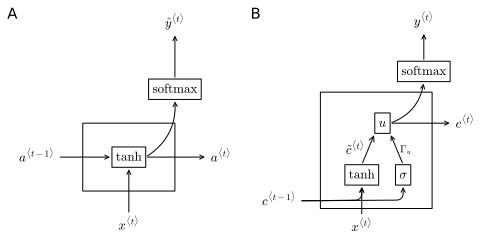

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax1, ax2 = axes
ax1.add_artist(Rectangle((0.05, .45), 0.1, .1, fc='w', ec='k'))

f = Flow(bbox=dict(boxstyle='square'), ax=ax1)
f.node(label='$a^{\\langle t-1 \\rangle}$', fontsize=13, bbox=dict(ec='none'))
f.node(label='$\\tanh$', fontsize=13)
f.node(label='$x^{\\langle t \\rangle}$', fontsize=13, travel='s', bbox=dict(ec='none'),
       edge_kwargs=dict(arrowprops=dict(arrowstyle='->')))
f.node(label='$a^{\\langle t \\rangle}$', fontsize=13, startpoint=2, bbox=dict(ec='none'))
f.node(label='$\\mathrm{softmax}$', fontsize=13, startpoint=2, travel='ne', distance=(.5, 1), 
       edge_kwargs=dict(tailport='e', headport='s', arrowprops=dict(connectionstyle='arc3,rad=-.3')))
f.node(label='$\\hat{y}^{\\langle t \\rangle}$', travel='n', fontsize=13, bbox=dict(ec='none'))

ax2.add_artist(Rectangle((0.05, .485), 0.135, .225, fc='w', ec='k'))
f = Flow(bbox=dict(boxstyle='square'), ax=ax2)
f.node(label='$c^{\\langle t-1 \\rangle}$', fontsize=13, bbox=dict(ec='none'))
f.node(label='$\\tanh$', fontsize=13, travel='ne', distance=(1, 0.5), edge_kwargs=dict(headport='s', tailport='e', arrowprops=dict(connectionstyle='arc,angleA=-90,angleB=0,armA=15,armB=10,rad=7')))

f.node(label='$x^{\\langle t \\rangle}$', fontsize=13, travel='s', bbox=dict(ec='none'),
       edge_kwargs=dict(arrowprops=dict(arrowstyle='->')))
f.node(label='$\\sigma$', fontsize=13, distance=.5, connect=False, startpoint=2)
f.edge(1, 4, headport='s', tailport='e', arrowprops=dict(connectionstyle='arc,angleA=-90,angleB=0,armA=15,armB=10,rad=7'))
f.node(label='$u$', fontsize=13, travel='nw', distance=(.25, 1), edge_kwargs=dict(tailport='n', headport='se', label='$\\Gamma_u$', ha='left', labelpos=(0.8, 0.5)))
f.edge(2, 5, tailport='n', headport='sw', label='$\\tilde{c}^{\\langle t \\rangle}$', fontsize=13, ha='right', labelpos=(0.2, 0.5))
f.node(label='$c^{\\langle t \\rangle}$', fontsize=13, bbox=dict(ec='none'))
f.node(label='$\\mathrm{softmax}}$', fontsize=13, startpoint=5, distance=(.5, 1), travel='ne', 
      edge_kwargs=dict(tailport='e', headport='s', arrowprops=dict(connectionstyle='arc3,rad=-.3')))
f.node(label='$y^{\\langle t \\rangle}$', fontsize=13, bbox=dict(ec='none'), travel='n')

for ax, l in zip(axes, 'AB'):
    ax.text(-.1, 1, l, transform=ax.transAxes, fontsize=15, va='center')

<i id="fig:rnnunit">RNN unit (A) and simplified GRU unit (B)</i>

When the gate $\Gamma_u \approx 0$, then the value of the memory cell $c^{\langle t \rangle} = c^{\langle t -1 \rangle}$ and so $c^{\langle t \rangle}$ will retain *memory* of its value as long as $\Gamma_u \approx 0$. Furthermore, since the gate when can be a very small value ($\Gamma_u \to 0$) it doesn't suffer from vanishing gradient problems. In fact, for $\lim_{ \Gamma_u \to 0} c^{\langle t \rangle} = c^{\langle t -1 \rangle}$. This allow an RNN to learn even very long-range dependencies.

As stated earlier, the memory cell $c^{\langle t \rangle}$ provides memory for properties in early layers and propagate them throughout the steps of an RNN. Usually $c^{\langle t \rangle}$ is a vector of values representing multiple properties (e.g. singular/plural of the subject, we are talking about heroic deeds, we are talking about food, ...); The gate $\Gamma_u$ is also a vector of the same dimension of the memory cell, where each element governs the update of an element of the memory cell.

#### Full GRU
The full GRU contain an additional gate $\Gamma_r$, where $r$ stands for relevance. The relevance gates encode for how *relevant* is $c^{\langle t-1 \rangle}$

$$
\begin{split}
& \tilde{c}^{\langle t \rangle} = \tanh \left( W_c \left [\color{red}{\Gamma_r}, \color{black}c^{\langle t-1 \rangle}, x^{\langle t \rangle} \right ] + b_c \right) \\
& \Gamma_u = \sigma \left(  W_u \left [ c^{\langle t-1 \rangle}, x^{\langle t \rangle} \right ] + b_u \right) \\
& \color{red}{\Gamma_r = \sigma \left(  W_r \left [ c^{\langle t-1 \rangle}, x^{\langle t \rangle} \right ] + b_r \right)} \\
& \color{black }c^{\langle t \rangle} = \underbrace{\Gamma_u \cdot \tilde{c}^{\langle t \rangle} + (1 - \Gamma_u) \cdot c^{\langle t-1 \rangle}}_{u}
\end{split}
$$

#### About Notation
In literature $c^{\langle t \rangle}$ and $\tilde{c}^{\langle t \rangle}$ are referred to as $h$ and $\tilde{h}$ respectively. For consistency with the notation of the basic RNN seen before and with the notation of LTSM in the next section, we instead used the $c^{\langle t \rangle}$ notation.

Furthermore, in literature the gates $\Gamma_u$ and $\Gamma_r$ are usually just referred to as $u$ and $r$. However, for the sake of clarity we use the greek letter $\Gamma$, which in the greek alphabet reads like an hard $G$ and thus reminds of the word *gate*.

## LSTM